# Fundamentos de Ciencias de Datos

*Esta tarea tiene solamente debe ser realizada máx 2 personas. 

## **Tarea 2**

### **Objetivos**

1. Entender los conceptos básicos del área de _Machine Learning_.
2. Usar Datasets de Prueba 1 y Tarea 1 para realizar regresión y clasificación binaria(logística). 
3. Entender cómo medir el desempeño de un algoritmo de regresión y clasificación binaria.
4. Familiarización con las herramientas de Python para entrenar y usar algoritmos de _Machine Learning_.

### **Metodología**

Deberás completar este cuaderno de python, siguiendo las instrucciones contenidas en él. Puedes utilizar contenido que encuentre en internet siempre y cuando lo referencies a través de un comentario. Por ejemplo:

>```Python
># código para abrir archivo obtenido desde  https://uniwebsidad.com/libros/algoritmos-python/capitulo-11
>archivo = open("archivo.txt")
>```

No olvides poner nombres representativos a tus variables. Caso contrario se verá reflejado en una penalización de tu nota.

### **Conjuntos de Datos**

En esta Tarea debe ocupar el el conjunto de datos utilizado en sus evaluaciones pasadas.
Ojo que para la clasificación binaria debe tomar en cuenta lo siguiente:

- Que los valores de la variable target estén relativamente balanceadas (que no exista una valor presente en menos del 25% del total, si no acomodar el dataset para que cumpla, puede eliminar entradas del valor dominante)




## Integrante

Por favor, llenar acá el nombre del alumno

- **Integrante**: Romina Gheza Schimunek

## Recomendaciones

Primero, deberías importar en la siguiente celda **TODOS** los módulos de Python necesarios para la correcta ejecución de su tarea.

In [137]:
import pandas as pan 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression  # Para utilizar la regresión lineal de sklearn
from sklearn.model_selection import train_test_split # Para utilizar testeos de sklearn
from sklearn.metrics import confusion_matrix # para sacar la matriz de confusion
from sklearn.metrics import mean_squared_error # Para utilizar error cuadrático medio
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import recall_score 


Luego, deberías guardar en una (o varias) variable(s) el sets de datos que utilizarás en la tarea. **el dataset debe ser adjuntado**

In [167]:
post_fuas = pan.read_csv('POSTULACIONES_FUAS_2021_WEB.csv',sep=';')
pdt2021=pan.read_csv('C_POSTULANTES_SELECCION_PDT_2021_PUB_MRUN.csv',sep=';', decimal=",")
d_matricula = pan.read_csv("D_MATRICULA_PDT__2021_PUB_MRUN.csv",sep=";")
dfren = pan.read_csv('Rendimiento_estudiantes_extracto_2019.csv')
un= pan.read_csv("uni.csv",sep=";")
asig=pan.read_csv("Asignacion 2021_WEB.csv",sep=";")


Además, si necesitas hacer algún pre-procesamiento **COMÚN** a todas sus futuras respuestas, deberías hacerlo en la siguiente celda

In [168]:
post_fuas.drop(post_fuas.index[post_fuas["EDAD"]<=16], inplace=True)
post_fuas.drop(post_fuas.index[post_fuas["EDAD"]>=79], inplace=True)

d_matricula.drop_duplicates(inplace=True)

In [169]:
asig[asig.duplicated()]

,ANIO_BENEFICIO,MRUN,BENEFICIO_BECA_FSCU,TIPO_ALUMNO


In [170]:
pdt2=pdt2021[["MRUN","PTJE_PREF_01","PTJE_PREF_02","PTJE_PREF_03","SITUACION_POSTULANTE"]]

In [171]:
post_fuas2=post_fuas[["MRUN","EDAD","GENERO","PROCESO"]]

In [172]:
d1= pan.merge(post_fuas2, pdt2, on="MRUN", how="inner")

In [173]:
d1= pan.merge(d1, d_matricula, on="MRUN", how="inner")

In [174]:
d1=d1[["MRUN","EDAD","GENERO","PROCESO","PTJE_PREF_01","PTJE_PREF_02","PTJE_PREF_03","VIA_ADMISION","NOMBRE_INSTITUCION","SITUACION_POSTULANTE"]]

In [175]:
d1["PROCESO"]=d1["PROCESO"].replace(["FUAS","BECA VOCACION DE PROFESOR","BECAS DE REPARACION"],[1,2,3])

In [176]:
uni=un[["NOMBRE_INSTITUCION","TIPO"]]

In [177]:
b2=pan.merge(d1, uni, on="NOMBRE_INSTITUCION", how="inner")

In [178]:
##b2["TIPO"]=b2["TIPO"].replace(["Privada","Pública"],[0,1])
le = LabelEncoder()
b2["TIPO"] = le.fit_transform(b2["TIPO"])

In [179]:
 dfren_2=dfren[["MRUN","PROM_GRAL","ASISTENCIA"]]

In [180]:
datosp= pan.merge(b2, dfren_2, on="MRUN", how="inner")

In [181]:
# Los datos asociados a pomedio general son presentados como si fuesen % o algo así ( 68.0 ) , por lo que es necesario
# dejarlos en un formato que nos permita trabajar de una manera adecuada
datosp["PROM_GRAL"]=datosp["PROM_GRAL"].replace({47.0:4.7,
                         48.0:4.8,
                         49.0:4.9,
                         51.0:5.1,
                         52.0:5.2,
                         53.0:5.3,
                         54.0:5.4,
                         55.0:5.5,
                         56.0:5.6,
                         57.0:5.7,
                         58.0:5.8,
                         59.0:5.9,
                         60.0:6.0,
                         61.0:6.1,
                         62.0:6.2,
                         63.0:6.3,
                         64.0:6.4,
                         65.0:6.5,
                         66.0:6.6,
                         67.0:6.7,
                         68.0:6.8,
                         69.0:6.9})

In [182]:
# Por analisis anteiores, tenemos un promedio que corresponde a 0. Este dato, podríamos considerarlo como un outlier, como 
# si el alumno hubiese dejado de estudiar, por lo que es mejor no contar con esos datos para evitar una mayor desviación
# en el modelo
datosp=datosp[(datosp.PROM_GRAL > 0)]
 


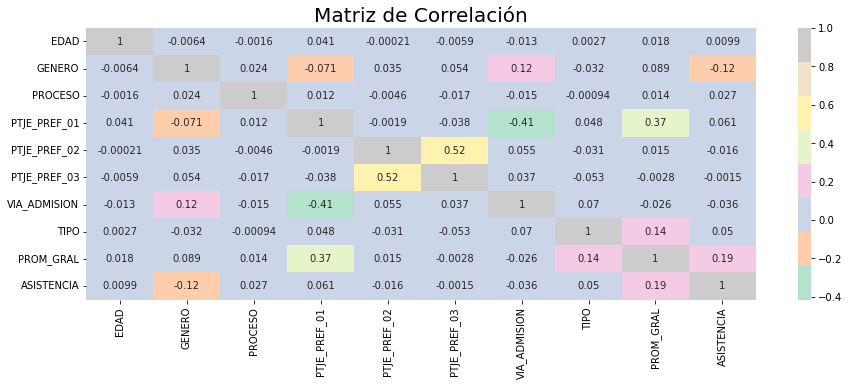

In [100]:
ax = sb.heatmap(datosp.corr(), annot = True,cmap="Pastel2")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,10]

In [183]:
datosp1=datosp[(datosp.PTJE_PREF_01 > 0)]
datosp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2538 entries, 0 to 2842
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MRUN                  2538 non-null   object 
 1   EDAD                  2538 non-null   int64  
 2   GENERO                2538 non-null   int64  
 3   PROCESO               2538 non-null   int64  
 4   PTJE_PREF_01          2538 non-null   float64
 5   PTJE_PREF_02          2538 non-null   float64
 6   PTJE_PREF_03          2538 non-null   float64
 7   VIA_ADMISION          2538 non-null   int64  
 8   NOMBRE_INSTITUCION    2538 non-null   object 
 9   SITUACION_POSTULANTE  2538 non-null   object 
 10  TIPO                  2538 non-null   int32  
 11  PROM_GRAL             2538 non-null   float64
 12  ASISTENCIA            2538 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(3)
memory usage: 267.7+ KB


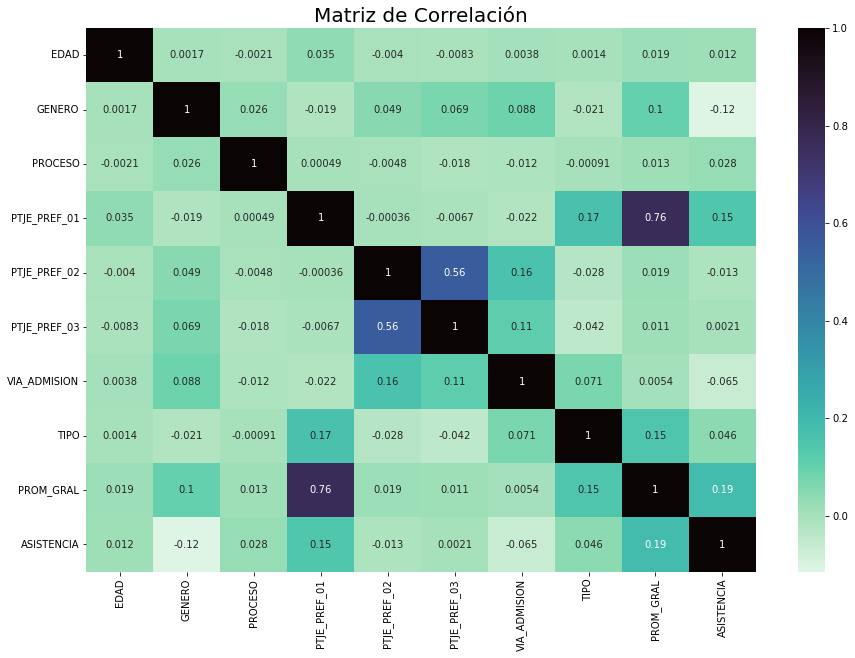

In [102]:
ax = sb.heatmap(datosp1.corr(), annot = True,cmap="mako_r")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,10]

In [184]:
datosp12=datosp[(datosp.PTJE_PREF_01 > 0) & (datosp.PTJE_PREF_02  > 0)]
datosp12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 2834
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MRUN                  870 non-null    object 
 1   EDAD                  870 non-null    int64  
 2   GENERO                870 non-null    int64  
 3   PROCESO               870 non-null    int64  
 4   PTJE_PREF_01          870 non-null    float64
 5   PTJE_PREF_02          870 non-null    float64
 6   PTJE_PREF_03          870 non-null    float64
 7   VIA_ADMISION          870 non-null    int64  
 8   NOMBRE_INSTITUCION    870 non-null    object 
 9   SITUACION_POSTULANTE  870 non-null    object 
 10  TIPO                  870 non-null    int32  
 11  PROM_GRAL             870 non-null    float64
 12  ASISTENCIA            870 non-null    float64
dtypes: float64(5), int32(1), int64(4), object(3)
memory usage: 91.8+ KB


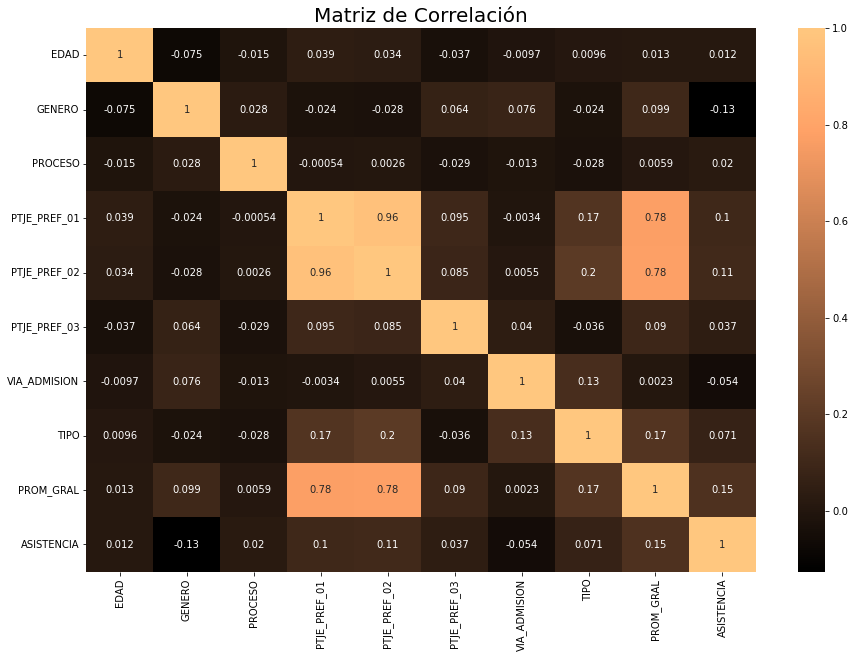

In [103]:
ax = sb.heatmap(datosp12.corr(), annot = True,cmap="copper")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,10]

In [104]:
datosp123=datosp[(datosp.PTJE_PREF_01 > 0) & (datosp.PTJE_PREF_02  > 0) & (datosp.PTJE_PREF_03 > 0)]
datosp123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2834
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MRUN                371 non-null    object 
 1   EDAD                371 non-null    int64  
 2   GENERO              371 non-null    int64  
 3   PROCESO             371 non-null    int64  
 4   PTJE_PREF_01        371 non-null    float64
 5   PTJE_PREF_02        371 non-null    float64
 6   PTJE_PREF_03        371 non-null    float64
 7   VIA_ADMISION        371 non-null    int64  
 8   NOMBRE_INSTITUCION  371 non-null    object 
 9   TIPO                371 non-null    int64  
 10  PROM_GRAL           371 non-null    float64
 11  ASISTENCIA          371 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 37.7+ KB


In [105]:
datosp123=datosp123[["GENERO","PTJE_PREF_01","PTJE_PREF_02","PTJE_PREF_03","VIA_ADMISION","TIPO","PROM_GRAL","ASISTENCIA"]]

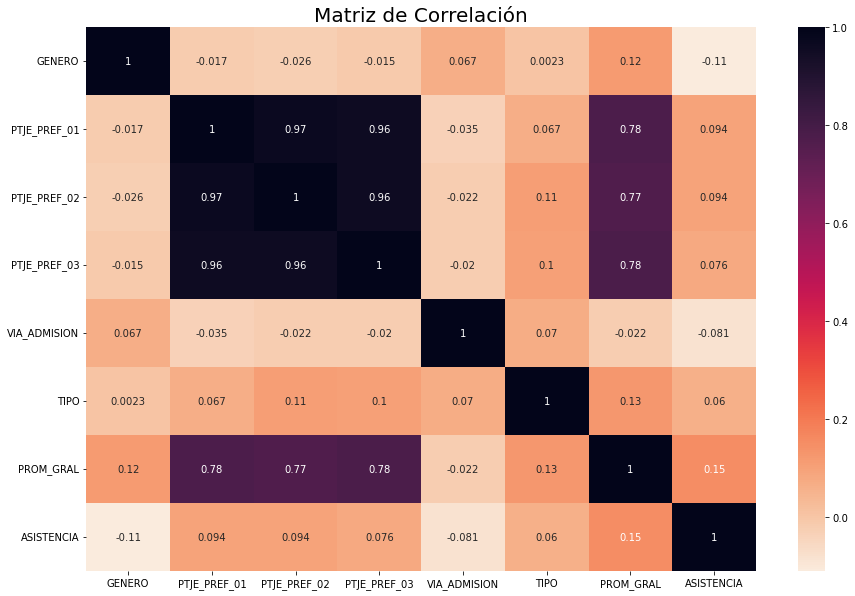

In [106]:
ax = sb.heatmap(datosp123.corr(), annot = True,cmap="rocket_r")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,10]

Utilice las variables previamente guardadas para mostrar parte de la información del conjunto de datos. 

In [ ]:
#Escriba su código aquí

## Actividad 

El principal objetivo de esta actividad es evaluar la capacidad de entrenar y usar algoritmos del área de _Machine Learning_. Además, vamos a evaluar que entiendas diferentes medidas de desempeño que se utilizan tanto en contextos de regresión como en contextos de clasificación. 
Uds. durante las evaluaciones pasadas realizaron ciertos hallazgos en gráficos, relaciones  y generaron hipotesis con respecto al comportamiento de sus datos. La idea de esta actividad es seguir avanzando en el ciclo CRISP-DM y modelar sus descubrimientos con dos modelos basados en una regresión lineal y otra logística.  Además de modelar se debe evaluar cuán bien funciona con las métricas adecuadas para ambos casos.
Lo bueno que la etapa de preparación de datos ya está lista y pueden directamente empezar la modelación.
##

### Parte 01 (3 pts) - Regresión 

De su trabajo anterior, busque alguna relación interesante descubierta  entre 2 o más variables y determine como podría predecir su valor con una regresión lineal(VALOR CONTINUO). Si su hipótesis pasada fue muy mala o simplemente no quiere ocupar debe modelar el comportamento de **PUNTAJE DE 1RA PREFERENCIA** como su variable dependiente.La idea es que utilizando la libreria de sklearn entrenes una Regresión lineal.
En base a RMSE y R^2 debes discutir qué tan bueno es tu regresor y cómo crees que puede mejorar,

- Selección de columnas o features a tomar. **0.5 Ptos.**
- Partición de datos en set entrenamiento y testeo.**0.5 Pt.**
- Entrenamiento de un algoritmo de REGRESIÓN LINEAL **1.0 Pt.**
- Medir el desempeño del modelo con RMSE y R^2 con el set de Testeo **0.5 Ptos.**
- Conclusión sobre el desempeño de su modelo. **0.5 Ptos.**


### Parte 02 (3 pts) - Clasificador

En esta parte de la tarea vamos a entrenar un clasificador binario.La idea es que utilizando la libreria de sklearn entrenes 1 clasificadores binarios que prediga la variable target.Si su hipótesis pasada fue muy mala o simplemente no quiere ocupar, debe hacer una clasificación con  **COD_DEPE** como su variable dependiente (Es municipal=1/ no es municipal = 0) .
Luego, debes presentar la matriz de confusion de cada modelo, y calcular el _accuracy_, _precision_ y _recall_ de tu clasificador. En base a estas métricas debes discutir qué tan bueno es tu clasificador y cómo crees que puede mejorar, para este punto considera que metrica es más acorde a tu modelo y el por qué. 

La distribución de puntaje de esta pregunta es la siguiente:

- Selección de columnas o features a tomar. **0.5 Ptos.**
- Partición de datos en set entrenamiento y testeo.**0.5 Pt.**
- Entrenamiento de un algoritmo de REGRESIÓN LOGÍSTICA  **1.0 Pt.**
- Medir el desempeño del modelo con la Matriz de confusión con el set de Testeo **0.5 Ptos.**
- Conclusión sobre el desempeño de su modelo según _accuracy_, _precision_ y _recall_. **0.5 Ptos.**


Para ambos casos debe realziar la partición de datos.Esto es   dividir el _dataset_ en una parte de entrenamiento, cuyo tamaño debe ser 70% del _dataset_, y otra de prueba, que corresponde al 30% restante del _dataset_. 

## Detalles académicos

**La tarea debe ser subida al buzón correspondiente de Webcursos hasta el 17 de junio a las 23:59 horas**.

## Pregunta 1

In [52]:
#datosp12=datosp[(datosp.PTJE_PREF_01 > 0) & (datosp.PTJE_PREF_02  > 0)]
datosp12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 2834
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MRUN                870 non-null    object 
 1   EDAD                870 non-null    int64  
 2   GENERO              870 non-null    int64  
 3   PROCESO             870 non-null    int64  
 4   PTJE_PREF_01        870 non-null    float64
 5   PTJE_PREF_02        870 non-null    float64
 6   PTJE_PREF_03        870 non-null    float64
 7   VIA_ADMISION        870 non-null    int64  
 8   NOMBRE_INSTITUCION  870 non-null    object 
 9   TIPO                870 non-null    int64  
 10  PROM_GRAL           870 non-null    float64
 11  ASISTENCIA          870 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 88.4+ KB


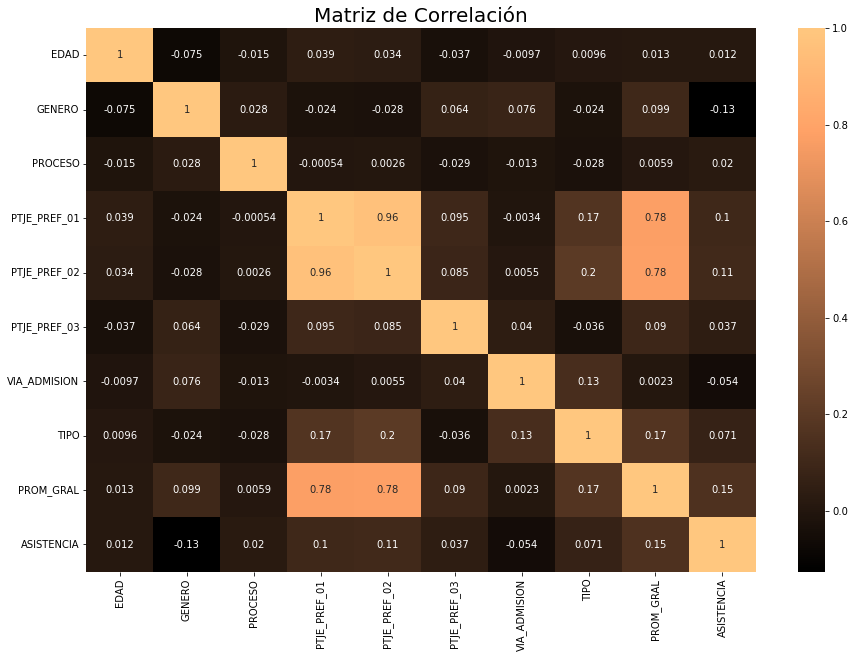

In [39]:
ax = sb.heatmap(datosp12.corr(), annot = True,cmap="copper")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,5]

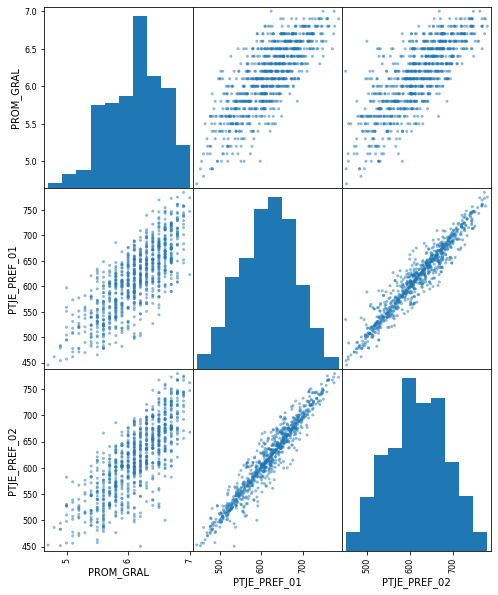

In [40]:
# EXTRA
# Para tener una visualización rapida 
from pandas.plotting import scatter_matrix
scatter_matrix(datosp12[["PROM_GRAL","PTJE_PREF_01","PTJE_PREF_02"]], figsize=(8,10))
plt.show()

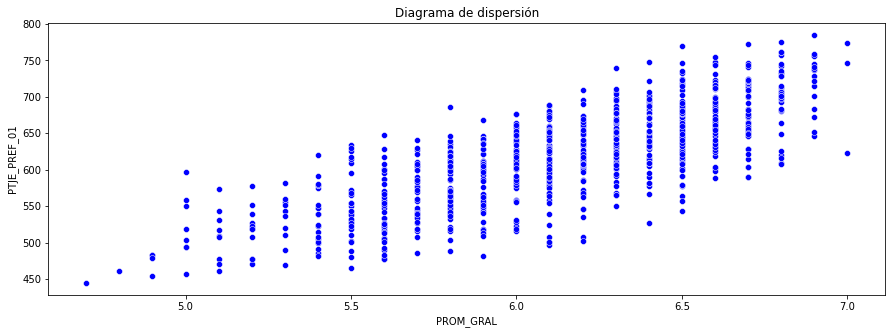

In [41]:
sb.scatterplot(data=datosp12, x="PROM_GRAL", y="PTJE_PREF_01",color="blue")
plt.title("Diagrama de dispersión")
plt.show()

In [53]:
p1=datosp12[["PTJE_PREF_01","PROM_GRAL"]]

In [57]:
# Creamos una matriz en donde la primera columna corresponden a unos y la segunda columna corresponde a los valores que
# utilizamos para predecir . En este caso, buscamos que por medio del promedio general , el modelo adivine el puntaje 
# de prefencia 1
X = np.column_stack([np.ones_like(p1.PROM_GRAL), p1.PROM_GRAL]) 


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,p1.PTJE_PREF_01,test_size=0.30)

In [59]:
# Calculando β obtiene la pendiente y el intercepto de la recta
β = np.linalg.inv(X_train.T@X_train)@(X_train.T@y_train)
β

array([-74.4190011 , 112.85347094])

In [64]:
# Prediccion del modelo a traves de la variable que insertamos (X_test@β)
y_pred = X_test@β

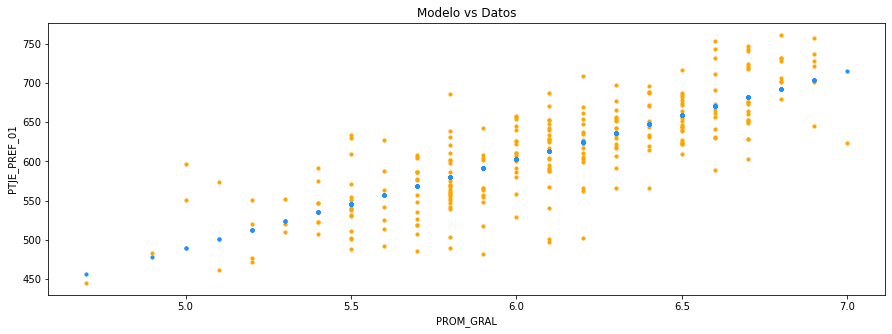

In [65]:
# Tomando todas las filas de la columna que contiene los promedios generales,graficamos los datos entregados, 
#que en este caso,corresponden a y_test  para que entregue lo que predice el modelo ( y_pred ) ( la linea dodgerblue )

plt.scatter(X_test[:,1],y_test, color = "orange", s=10) #: toma toda las filas para la segunda columna
plt.scatter(X_test[:,1],y_pred, color = "dodgerblue",s=10)
plt.xlabel("PROM_GRAL")
plt.ylabel("PTJE_PREF_01")
plt.title("Modelo vs Datos")
plt.show()

In [66]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [76]:
# Utilizando .score(X_train,y_train) vemos que tan bueno fue el entrenamiento de los datos 
modelo.score(X_train,y_train)

0.5911468728072576

In [ ]:
# Ahora, si no lo hacemos como matriz

In [ ]:
# Buscamos mediante el promedio general , predecir el puntaje de preferencia 1 

In [77]:
p1pgdat12=datosp12[["PTJE_PREF_01","PROM_GRAL"]]

In [78]:
# Ahora, se define el set de prueba y el set de entrenamiento
# Set de entrenamiento -- 70%
# Set de testeo -- 30%

train_set2, test_set2 = train_test_split(p1pgdat12, test_size=0.30)

In [79]:
# Realizamos un test
test_set2

,PTJE_PREF_01,PROM_GRAL
1013,554.70,5.5
1307,616.70,6.1
645,527.50,5.2
364,659.25,6.2
1481,639.10,5.8
...,...,...
174,645.95,6.5
1873,567.20,5.9
1787,483.60,5.6
2090,711.80,6.6


In [80]:
# Tomamos puntaje PROM_GRAL como variable independiente y 
# puntaje pref 1 como vartiable dependiente ( la que se desea predecir)
X_train2 = train_set2[["PROM_GRAL"]]
y_train2 = train_set2[["PTJE_PREF_01"]]

In [81]:
# Definimos una variable que genere la regresion  
rl2 = LinearRegression()

# Generamos el entrenamiento de las variables y generamos el modelo de regresión 
rl2.fit(X_train2, y_train2)

LinearRegression()

In [82]:
# Preguntamos el coeficiente ( w ) que acompaña a la variable x 
rl2.coef_

array([[111.36126122]])

In [83]:
# Preguntamos el valor del intercepto ( b )
rl2.intercept_

array([-65.94480679])

In [90]:
y_test2 = test_set2[["PTJE_PREF_01"]]
y_test

1162    603.70
1645    651.70
2381    541.75
1366    488.65
1460    556.90
         ...  
2115    461.60
261     623.00
1973    634.40
1350    566.00
2834    617.80
Name: PTJE_PREF_01, Length: 261, dtype: float64

In [89]:
# Recordemos que test_set tiene nuestras observaciones de prueba
# Predecimos sobre todos los input y mostramos los resultados
X_test2 = test_set2[["PROM_GRAL"]]
y_pred2 = rl2.predict(X_test2)
y_pred2

array([[546.54212994],
       [613.35888667],
       [513.13375157],
       [624.49501279],
       [579.9505083 ],
       [680.1756434 ],
       [579.9505083 ],
       [657.90339116],
       [691.31176953],
       [546.54212994],
       [669.03951728],
       [613.35888667],
       [535.40600381],
       [669.03951728],
       [646.76726504],
       [624.49501279],
       [579.9505083 ],
       [657.90339116],
       [635.63113892],
       [602.22276055],
       [657.90339116],
       [624.49501279],
       [669.03951728],
       [624.49501279],
       [624.49501279],
       [657.90339116],
       [535.40600381],
       [557.67825606],
       [635.63113892],
       [579.9505083 ],
       [635.63113892],
       [624.49501279],
       [657.90339116],
       [657.90339116],
       [635.63113892],
       [635.63113892],
       [646.76726504],
       [568.81438218],
       [646.76726504],
       [669.03951728],
       [602.22276055],
       [613.35888667],
       [680.1756434 ],
       [568

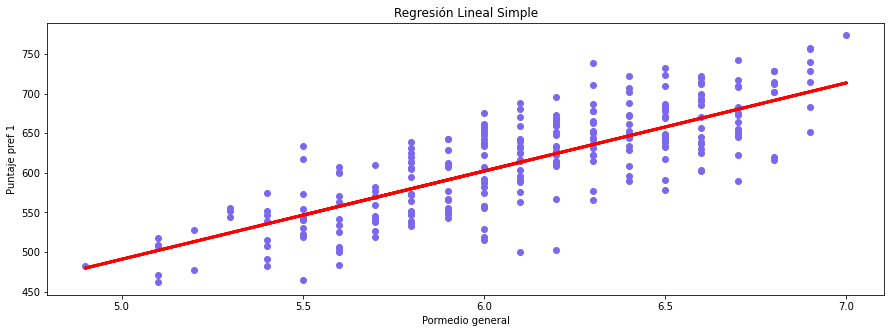

In [95]:
# Graficamos el modelo
plt.scatter(X_test2, y_test2,color="mediumslateblue")
plt.plot(X_test2, y_pred2, color='red', linewidth=3)
plt.title("Regresión Lineal Simple")
plt.xlabel("Pormedio general")
plt.ylabel("Puntaje pref 1")
plt.show()


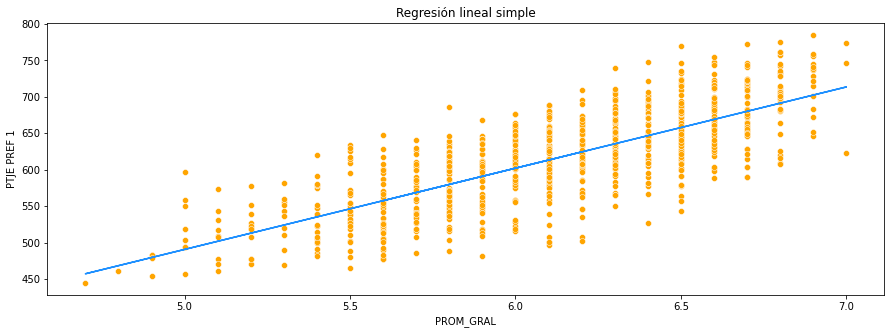

In [86]:
# Para visualizar la regeresión en vez de tomar el df reducido, tomamos el df completo para tener más datos

sb.scatterplot(data=p1pgdat12, x="PROM_GRAL", y="PTJE_PREF_01",color="orange")
plt.xlabel("PROM_GRAL")
plt.ylabel("PTJE PREF 1")
plt.title("Regresión lineal simple")
pg2 = p1pgdat12[["PROM_GRAL"]]
pg1 = p1pgdat12[["PTJE_PREF_01"]]

plt.plot(pg2, rl2.predict(pg2), color="dodgerblue")
plt.show()

In [91]:
# Mediremos la calidad de la regresion utilizando el error cuadrático medio
#from sklearn.metrics import mean_squared_error

In [92]:
# Ahora calculamos el error cuadrático medio ( MSE )
l_mse = mean_squared_error(y_test2, y_pred2)
l_mse

1547.9388486081534

In [93]:
# Ahora calculamos la raíz del error cuafrático medio ( RMSE )
np.sqrt(l_mse)

39.343854013151194

In [99]:
# Calculamos la precisión del modelo
rl2.score(X_train2, y_train2)

0.5879704091887592

In [ ]:
# Comentarios generales 
# Es importante tener en cuenta,que para hacer este modelo, no tome todos los datos ya que solamente busque los 
# que tenian puntaje diferente de 0 en el puntaje pref 1 y 2. Esto principalmente porque con ayuda de una visualizacion
# habia mas correlacion entre las variables puntaje preferencia y promedio. Esto genera, que al momento de crear los
# set de entrenamiento y testeo, exista una gran diferencia en cuanto a la cantidad de datos utilizados.
# En cuanto a los  valores obtenidos:
#  El error cuadratico medio es bastante alto. Su valor representa lo que en promedio se desvian las predicciones
#   en este caso, el error cuadratico medio corresponde a 39.34 , lo que implica que en promedio el puntaje que se predice
#   utilizando el promedio general, se equivoca en 39.34 puntos
# En cuando a la precision del modelo tenemos un 58.79% , lo cual no es muy bueno ya que se espera que con los modelos
# se pueda llegar a un % más cercano al 100%. Para mejorar esta situación existen multiples opciones que deben estar 
# bajo pruebas y error para poder verificar cual es la mejor decision a tomas. Independiente de esto, tal como se ve en el
# grafico, hay algunos datos que estan un poco alejados de lo que sería esta recta que minimiza los errores , por lo que 
# se podría pensar en tomarlos como outliers y no considerarlos. De mismo modo, se podría realizar una nueva limpieza con 
# los datos y verificar si se van cumpliendo correctamente las condiciones y especificaciones que vamos explicitando,
# ya que muchas veces, puede ocurrir que en bases tan grandes, se escape una variable o simplemente nos hayamos equivocado 
# en algo. Ademas se podría pensar en incorporar otra variable como variable independiente para generar una regresion
# multiple para ver si mejora la situacion, pero es un poco complejo ya que gracias a la matriz de correlacion, notamos que
# en general no hay buena correlacion con los datos, lo que genera que encontrar relaciones para generar buenos modelos sea
# una tarea mas compleja. Dado que existen multiples datos, se podria buscar una base que contenga otro tipo de variables
# y que podamos unir con la base que ya tenemos para que de esta forma, tengamos un modelo mas completo con variables que
# generen una mayor precision en el dato a predecir. Por ejemplo, podria incorporarse una base de datos en donde se indique
# la cantidad de personas que habitan en el hogar , de esta forma se podria verificar si existe una relacion en cuanto 
# el rendimiento y la cantidad de personas con las que vive, algo como " la cantidad de personas afecta el rendimiento del
# alumno"


#Tambien, sería una buena idea, tomar en cuanta el puntaje
# minimo que se exige en Chile para entrar a una carrera, independiente de cual sea. Para ser mas clara, por ejemplo 
# hay una carrera que esta en la universidad "CSSf" y que el puntaje de corte son 500 puntos. Teniendo eso en cuenta,
# los datos quedarían restringidos a que si existe una prediccion de puntaje que esta por debajo de los 500 puntos, 
# tecnicamente no podría ingresar a ninguna universidad por lo que se podría utilizar una regresion logistica en donde 
# se pueda predecir si la persona con ese puntaje podría entrar a considerar si entro o no a la universidad.

In [ ]:
# Otro modelo podria ser que mediante el puntaje pref 2 , se haga una prediccion del puntaje pref 1 

In [108]:
# Para trabajar mejor con los datos, reducimos las columnas
p1p2=datosp12[["PTJE_PREF_01","PTJE_PREF_02"]]

In [109]:
# Ahora, definiremos el set de prueba y el set de entrenamiento
# Set de entrenamiento -- 70%
# Set de testeo -- 30%

train_set_p1p2, test_set_p1p2 = train_test_split(p1p2, test_size=0.30)

In [110]:
# Realizamos un test
test_set_p1p2

,PTJE_PREF_01,PTJE_PREF_02
1025,622.80,619.30
1320,642.40,642.40
1656,633.15,661.90
721,678.00,675.75
388,732.70,732.50
...,...,...
2090,711.80,711.60
1543,628.90,628.90
585,507.35,507.35
1131,690.75,653.90


In [113]:
# Tomamos puntaje pref 2 como variable independiente y 
# puntaje pred 1 como vartiable dependiente ( la que se desea predecir)
X_train_p1p2 = train_set_p1p2[["PTJE_PREF_02"]]
y_train_p1p2 = train_set_p1p2[["PTJE_PREF_01"]]

In [114]:
# Definimos una variable que genere la regresion  
rl_p1p2 = LinearRegression()
 
# Generamos el entrenamiento de las variables y generamos el modelo de regresión 
rl_p1p2.fit(X_train_p1p2, y_train_p1p2)

LinearRegression()

In [115]:
# Preguntamos el coeficiente ( w ) que acompaña a la variable x 
rl_p1p2.coef_

array([[0.9337697]])

In [116]:
# Preguntamos el valor del intercepto ( b )
rl_p1p2.intercept_

array([40.64322739])

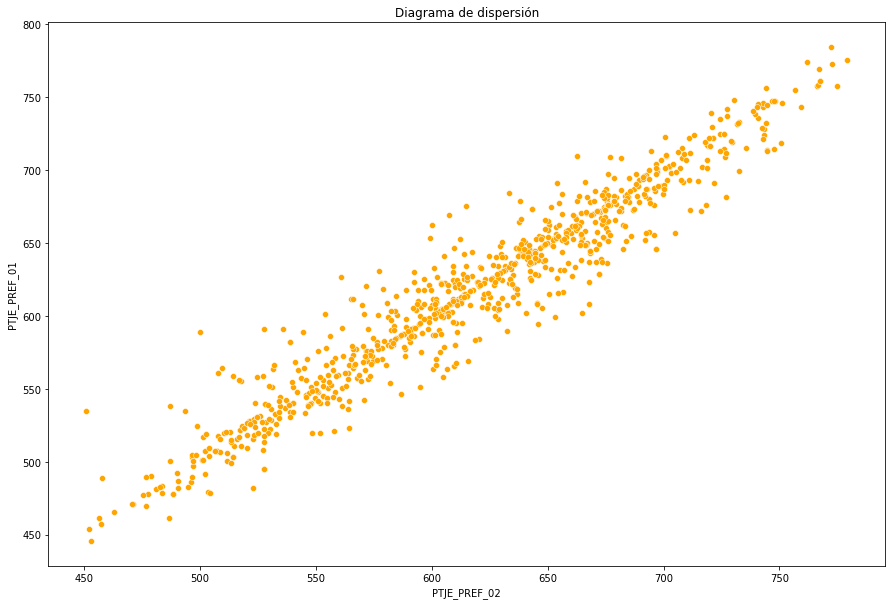

In [117]:
sb.scatterplot(data=datosp12, x="PTJE_PREF_02", y="PTJE_PREF_01",color="orange")
plt.title("Diagrama de dispersión")
plt.show()

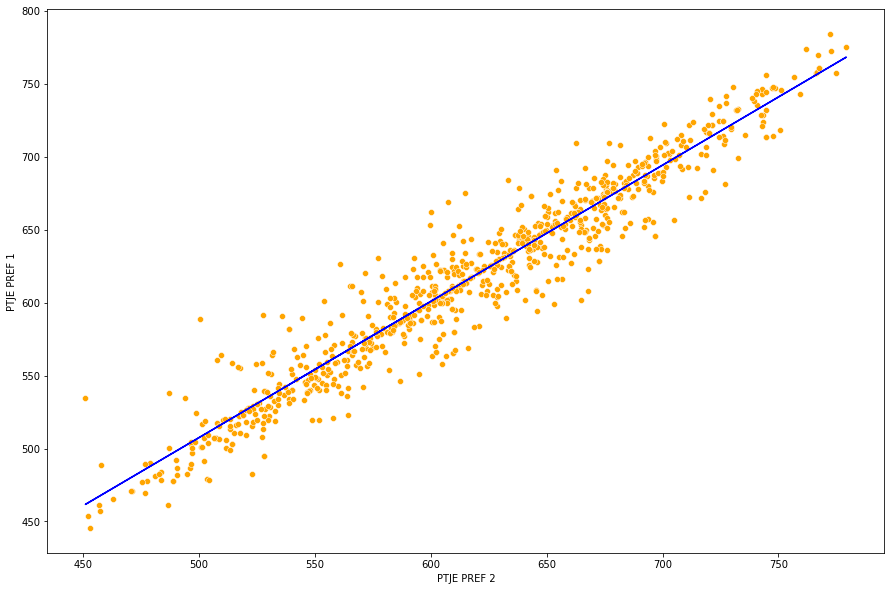

In [118]:
# Para visualizar la regeresión en vez de tomar el df reducido, tomamos el df completo para tener más datos

sb.scatterplot(data=p1p2, x="PTJE_PREF_02", y="PTJE_PREF_01",color="orange")
plt.xlabel("PTJE PREF 2")
plt.ylabel("PTJE PREF 1")

punt2 = p1p2[["PTJE_PREF_02"]]
punt1 = p1p2[["PTJE_PREF_01"]]

plt.plot(punt2, rl_p1p2.predict(punt2), color="blue")
plt.show()

In [119]:
# Recordemos que test_set tiene nuestras observaciones de prueba
# Predecimos sobre todos los input y mostramos los resultados
X_test_p1p2 = test_set_p1p2[["PTJE_PREF_02"]]
y_pred_p1p2 = rl_p1p2.predict(X_test_p1p2)
y_pred_p1p2

array([[618.92680366],
       [640.49688377],
       [658.70539295],
       [671.63810332],
       [724.62953389],
       [655.15706809],
       [704.74023925],
       [549.26758391],
       [655.90408385],
       [625.46319157],
       [597.8236084 ],
       [719.5871775 ],
       [690.64031675],
       [644.465405  ],
       [683.68373247],
       [633.49361101],
       [691.48070948],
       [613.88444727],
       [594.55541444],
       [718.74678477],
       [616.49900243],
       [615.6586097 ],
       [674.48610091],
       [734.24736182],
       [568.87674765],
       [568.4098628 ],
       [604.54675025],
       [634.33400374],
       [609.68248361],
       [638.81609831],
       [527.74419229],
       [549.73446876],
       [513.59758131],
       [762.21376439],
       [647.5935335 ],
       [709.54915321],
       [602.77258782],
       [637.8823286 ],
       [749.6545619 ],
       [711.37000413],
       [554.35662879],
       [674.76623182],
       [658.42526204],
       [624

In [120]:
y_test_p1p2 = test_set_p1p2[["PTJE_PREF_01"]]
y_test_p1p2

,PTJE_PREF_01
1025,622.80
1320,642.40
1656,633.15
721,678.00
388,732.70
...,...
2090,711.80
1543,628.90
585,507.35
1131,690.75


In [121]:
# Ahora calculamos el error cuadrático medio ( MSE )
l_mse_p1p2 = mean_squared_error(y_test_p1p2, y_pred_p1p2)
l_mse_p1p2

326.53621452521145

In [122]:
# Ahora calculamos la raíz del error cuafrático medio ( RMSE )
np.sqrt(l_mse_p1p2)

18.070313072141595

In [124]:
# Calculamos el coeficiente de determinacion R2 para ver la calidad del modelo 
rl_p1p2.score(y_test_p1p2, y_pred_p1p2)

0.9143271611600657

In [ ]:
# En este caso, tenemos que en general el modelo falla en 18.07 puntos y tiene una precision de 91.43 % , 
# lo cual es bastante bueno


## Pregunta 2

In [185]:
datosp12.head()

,MRUN,EDAD,GENERO,PROCESO,PTJE_PREF_01,PTJE_PREF_02,PTJE_PREF_03,VIA_ADMISION,NOMBRE_INSTITUCION,SITUACION_POSTULANTE,TIPO,PROM_GRAL,ASISTENCIA
0,423908,18,2,1,533.9,538.80,541.0,1,U. DE VALPARAÍSO,P,1,5.6,90.0
6,2691841,18,1,1,587.5,591.10,0.0,1,U. DE VALPARAÍSO,P,1,6.1,95.0
19,5799200,19,1,1,553.7,550.00,0.0,1,U. DE VALPARAÍSO,P,1,5.8,94.0
22,6609973,19,2,1,692.1,714.95,0.0,1,U. DE VALPARAÍSO,P,1,6.6,88.0
26,7526156,19,2,1,625.1,613.90,0.0,1,U. DE VALPARAÍSO,P,1,5.5,92.0


In [186]:
datosp12.describe()

,EDAD,GENERO,PROCESO,PTJE_PREF_01,PTJE_PREF_02,PTJE_PREF_03,VIA_ADMISION,TIPO,PROM_GRAL,ASISTENCIA
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,18.790805,1.587356,1.002299,616.103448,617.268621,263.225230,1.732184,0.409195,6.121379,92.728736
std,1.815395,0.492593,0.067806,65.916528,68.061160,308.736876,1.869936,0.491968,0.452995,7.240563
min,17.000000,1.000000,1.000000,445.450000,450.900000,0.000000,1.000000,0.000000,4.700000,31.000000
25%,18.000000,1.000000,1.000000,568.812500,567.850000,0.000000,1.000000,0.000000,5.800000,90.000000
50%,19.000000,2.000000,1.000000,619.025000,616.925000,0.000000,1.000000,0.000000,6.100000,94.000000
75%,19.000000,2.000000,1.000000,661.837500,667.787500,604.825000,1.000000,1.000000,6.500000,98.000000
max,32.000000,2.000000,3.000000,784.200000,779.250000,778.300000,7.000000,1.000000,7.000000,100.000000


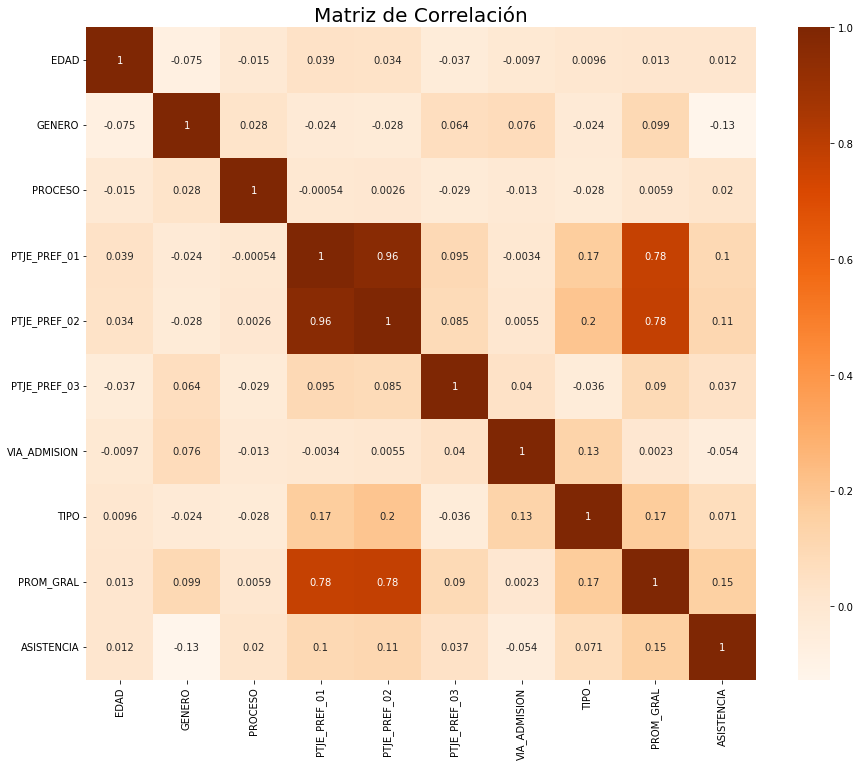

In [188]:
ax = sb.heatmap(datosp12.corr(), annot = True,cmap="Oranges")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,12]

In [147]:
asig=pan.read_csv("Asignacion 2021_WEB.csv",sep=";")

In [187]:
asi_bd= pan.merge(datosp12,asig, on="MRUN", how="inner")
asi_bd.head(10)

,MRUN,EDAD,GENERO,PROCESO,PTJE_PREF_01,PTJE_PREF_02,PTJE_PREF_03,VIA_ADMISION,NOMBRE_INSTITUCION,SITUACION_POSTULANTE,TIPO,PROM_GRAL,ASISTENCIA,ANIO_BENEFICIO,BENEFICIO_BECA_FSCU,TIPO_ALUMNO
0,423908,18,2,1,533.90,538.80,541.0,1,U. DE VALPARAÍSO,P,1,5.6,90.0,2021,GRATUIDAD,1
1,2691841,18,1,1,587.50,591.10,0.0,1,U. DE VALPARAÍSO,P,1,6.1,95.0,2021,GRATUIDAD,1
2,5799200,19,1,1,553.70,550.00,0.0,1,U. DE VALPARAÍSO,P,1,5.8,94.0,2021,FSCU,1
3,7526156,19,2,1,625.10,613.90,0.0,1,U. DE VALPARAÍSO,P,1,5.5,92.0,2021,GRATUIDAD,1
4,7565769,19,1,1,547.60,551.10,0.0,1,U. DE VALPARAÍSO,P,1,5.4,96.0,2021,GRATUIDAD,1
5,8221190,19,1,1,642.50,629.95,0.0,1,U. DE VALPARAÍSO,P,1,6.0,91.0,2021,GRATUIDAD,1
6,10013615,18,1,1,507.40,506.50,0.0,1,U. DE VALPARAÍSO,P,1,5.2,99.0,2021,GRATUIDAD,1
7,11196144,19,1,1,550.95,530.90,0.0,1,U. DE VALPARAÍSO,P,1,5.0,98.0,2021,GRATUIDAD,1
8,11505081,19,2,1,538.80,546.50,0.0,1,U. DE VALPARAÍSO,P,1,5.4,93.0,2021,TRASPASO,1
9,12372951,18,1,1,661.60,661.60,0.0,1,U. DE VALPARAÍSO,P,1,6.2,97.0,2021,GRATUIDAD,1


In [189]:
#from sklearn.preprocessing import LabelEncoder
#Llamamos a la función de LabelEncoder
le = LabelEncoder()
asi_bd["SITUACION_POSTULANTE"] = le.fit_transform(asi_bd["SITUACION_POSTULANTE"])

In [190]:
asi_bd.head(10)

,MRUN,EDAD,GENERO,PROCESO,PTJE_PREF_01,PTJE_PREF_02,PTJE_PREF_03,VIA_ADMISION,NOMBRE_INSTITUCION,SITUACION_POSTULANTE,TIPO,PROM_GRAL,ASISTENCIA,ANIO_BENEFICIO,BENEFICIO_BECA_FSCU,TIPO_ALUMNO
0,423908,18,2,1,533.90,538.80,541.0,1,U. DE VALPARAÍSO,0,1,5.6,90.0,2021,GRATUIDAD,1
1,2691841,18,1,1,587.50,591.10,0.0,1,U. DE VALPARAÍSO,0,1,6.1,95.0,2021,GRATUIDAD,1
2,5799200,19,1,1,553.70,550.00,0.0,1,U. DE VALPARAÍSO,0,1,5.8,94.0,2021,FSCU,1
3,7526156,19,2,1,625.10,613.90,0.0,1,U. DE VALPARAÍSO,0,1,5.5,92.0,2021,GRATUIDAD,1
4,7565769,19,1,1,547.60,551.10,0.0,1,U. DE VALPARAÍSO,0,1,5.4,96.0,2021,GRATUIDAD,1
5,8221190,19,1,1,642.50,629.95,0.0,1,U. DE VALPARAÍSO,0,1,6.0,91.0,2021,GRATUIDAD,1
6,10013615,18,1,1,507.40,506.50,0.0,1,U. DE VALPARAÍSO,0,1,5.2,99.0,2021,GRATUIDAD,1
7,11196144,19,1,1,550.95,530.90,0.0,1,U. DE VALPARAÍSO,0,1,5.0,98.0,2021,GRATUIDAD,1
8,11505081,19,2,1,538.80,546.50,0.0,1,U. DE VALPARAÍSO,0,1,5.4,93.0,2021,TRASPASO,1
9,12372951,18,1,1,661.60,661.60,0.0,1,U. DE VALPARAÍSO,0,1,6.2,97.0,2021,GRATUIDAD,1


In [191]:
# selecciona proceso FUAS
asi_dbF=asi_bd[asi_bd["PROCESO"]==1]

In [192]:
# Selecciona via admision regular
asi_dbF=asi_bd[asi_bd["VIA_ADMISION"]==1]

In [193]:
dp2=asi_dbF[["EDAD","GENERO","PTJE_PREF_01","PTJE_PREF_02","SITUACION_POSTULANTE","TIPO","PROM_GRAL"]]

In [194]:
dp2.describe()

,EDAD,GENERO,PTJE_PREF_01,PTJE_PREF_02,SITUACION_POSTULANTE,TIPO,PROM_GRAL
count,517.000000,517.000000,517.000000,517.000000,517.0,517.000000,517.000000
mean,18.692456,1.593810,615.597002,617.449033,0.0,0.419729,6.132882
std,1.560225,0.491596,61.469303,63.759733,0.0,0.493993,0.437623
min,18.000000,1.000000,454.000000,451.900000,0.0,0.000000,4.800000
25%,18.000000,1.000000,572.550000,571.900000,0.0,0.000000,5.800000
50%,19.000000,2.000000,616.200000,613.900000,0.0,0.000000,6.200000
75%,19.000000,2.000000,658.150000,663.800000,0.0,1.000000,6.500000
max,32.000000,2.000000,784.200000,772.400000,0.0,1.000000,7.000000


In [195]:
dp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 631
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  517 non-null    int64  
 1   GENERO                517 non-null    int64  
 2   PTJE_PREF_01          517 non-null    float64
 3   PTJE_PREF_02          517 non-null    float64
 4   SITUACION_POSTULANTE  517 non-null    int32  
 5   TIPO                  517 non-null    int32  
 6   PROM_GRAL             517 non-null    float64
dtypes: float64(3), int32(2), int64(2)
memory usage: 28.3 KB


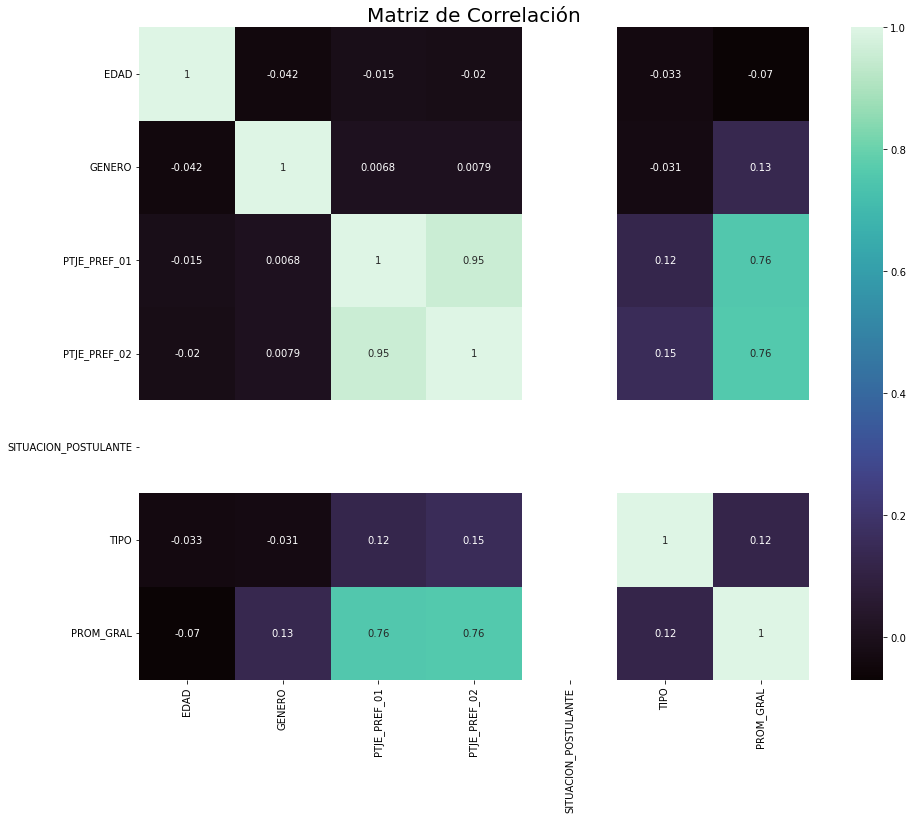

In [196]:
ax = sb.heatmap(dp2.corr(), annot = True,cmap="mako")
plt.title("Matriz de Correlación",size=20)
plt.rcParams['figure.figsize'] = [15,10]

In [197]:
# 300 son privadas
# 217 son publicas
dp2.groupby("TIPO").size()

TIPO
0    300
1    217
dtype: int64

In [220]:
# Para armar la regresion 

# Reducimos las variables 
dp2_peq = dp2[["PTJE_PREF_01","PTJE_PREF_02","SITUACION_POSTULANTE","PROM_GRAL","TIPO"]]

# De definen los test.. tener en cuanta que ahora la variable dependiente y es bonaria
# En X, especificamos las variables que se utilizaran para predecir
X_p2_rl= dp2_peq[["PTJE_PREF_01","PTJE_PREF_02","SITUACION_POSTULANTE","PROM_GRAL"]]
y_p2_rl= dp2_peq["TIPO"]

# Seespecifica el % de entrenamiento 70% y testeo 30%
X_train_p2_rl, X_test_p2_rl, y_train_p2_rl, y_test_p2_rl = train_test_split(X_p2_rl, y_p2_rl, test_size=0.3)

In [221]:
#Regresion Logistica
RLog = LogisticRegression()

#Entrenamiento del modelo 
RLog.fit(X_train_p2_rl, y_train_p2_rl)

# Predicción
y_pred_p2_rl = RLog.predict(X_test_p2_rl)

In [222]:
y_pred_p2_rl 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [208]:
# Para evaluar el modelo

In [223]:
RLog.score(X_train_p2_rl , y_train_p2_rl )

0.5817174515235457

In [224]:
# Calculamos la matriz de confusion
from sklearn.metrics import confusion_matrix as cm
cm(y_test_p2_rl,y_pred_p2_rl)

array([[86,  5],
       [54, 11]], dtype=int64)

In [225]:
# Calculamos la exactitud del modelo
from sklearn.metrics import accuracy_score as acs
#Veamos cuál es la exactitud de nuestro modelo (que tan cerca del valor real estamos)
exact= acs(y_test_p2_rl, y_pred_p2_rl)
exact

0.6217948717948718

In [226]:
# Precision de nuestro modelo
# Esto es de la cantidad de veces que el modelo predice que algo es de una clase , el % de veces que estoy en lo correcto
from sklearn.metrics import precision_score as ps
precision = ps(y_test_p2_rl, y_pred_p2_rl)
precision

0.6875

In [231]:
# Obtenemos el recall
# El recall es como de los positivos que existen , en este caso 1 ( universidades publicas), cuantos se detectan
#from sklearn.metrics import recall_score 
rcall=recall_score(y_test_p2_rl,y_pred_p2_rl)
rcall

0.16923076923076924

In [ ]:
# De la matriz de confusion , tenemos que de todos los unos que habían en cuestion , efectivamente, 84 eran clasificadas 
# como clase1 ,y tenemos que de todos los ceros que habían en cuestion , efectivamente, 11 eran clasificadas como clase 0
# Llevandolo al significado correspondiente,el modelo predice y confirma que 84 alumnos acceden a una universidad publica 
# , mientras que 11 acceden a una unversidad privada . ( en la data estaba definido privado,publico por lo tanto cuando
# hice el cambio 0 corresponde a privado y 1 corresponde a publico). 5 se clasificaron como universidades privadas mientras que
# eran universidades publicas y 54 fueron clasificadas como universidades publicas mientras que eran de universidades privadas 
# En cuanto a los falsos negativos y falsos positivos, la idea es que sean valores lo mas pequeño posible ya que 
# de esta forma se predice mejor .

# Teniendo esto en cuenta, con el calculo de la exactitud de cierta forma es un indicador que hay fallos en el 
# modelo que provocan la predicion no sea tan buena ya que un 62% es bajo . Este valor nos indica que un 62% de los datos,
# que coorresponden a 0 ( universidad privada ) y a 1 ( unversidad publica ) , fueron clasificados correctamente por el modelo


# A partir del recall se confirma que el modelo que se estructuro no es bueno, ya que de la prediccion realizada 
# solamente el 0.16 estan bien clasificados

# Como la idea principal de crear este modelo era de cierta forma predecir si la persona terminaba en una universidad 
# publica o privada, tiene mas sentido que busquemos estrategias para generar una mayor correlacion entre las variables
# independientes del modelo y generar otro modelo . Hay que recordar que dependiendo del modelo que se plantea, las 
# metricas de precision y recall pueden variar su valor. Por ejemplo, un modelo que nos permita saber si es mejor opcion 
# entrar a una universidad privada o pública dependiendo de variables tales como el dinero disponible del alumno , si vive
# en la localidad de la universidad , etc. asi por ejemplo si hay 10 universidades en el radio de donde vive la persona, 
# 4 privadas y 6 publicas, no tiene dinero suficiente para pagar 2 de las privadas y hay 5 de las publicas que le conviene 
# estudiar ya sea porque le queda mas cerca, paga menos, la  universidad tiene mas prestigio ... en un caso como este se
# buscaria un modelo con alta recall y baja precision ya que conviene tener falsos negativos ( que prediga privada mientras que
# es publica)  

# Es importante tener en cuenta, que probablemente el tratamiento previo de las variables quizas no fue el adecuado y no
# se realizaron de la manera mas correcta, lo que puede afectar estos resultdos. 

